## Model 1: Convolutional Neural Network (CNN) with Attention Layer

This section demonstrates how to build and train a Convolutional Neural Network (CNN) with an attention mechanism. The model is designed for image classification tasks. We will use the Keras library to construct the model, compile it, and train it on a dataset.

### Steps:
1. **Build the CNN model with an attention layer.**
2. **Compile the model with an appropriate optimizer and loss function.**
3. **Train the model on a given dataset.**
4. **Plot the training accuracy and loss.**
5. **Evaluate the model's performance.**
6. **Visualize the attention weights on sample images.**


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, List


In [5]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

2.16.1
Num GPUs Available:  0
False
[]


In [7]:
import tensorflow as tf
import os

def check_tensorflow_gpu():
    print(f"TensorFlow version: {tf.__version__}")

    # Check if TensorFlow is built with CUDA
    print(f"Built with CUDA: {tf.test.is_built_with_cuda()}")

    # Check if TensorFlow can see any GPUs
    gpus = tf.config.list_physical_devices('GPU')
    print(f"GPUs visible to TensorFlow: {gpus}")

    # Check if GPU is available (this is different from just being visible)
    print(f"GPU available: {tf.test.is_gpu_available()}")

    # If GPUs are available, print some information about them
    if gpus:
        for gpu in gpus:
            print(f"GPU name: {gpu.name}")
            print(f"GPU device type: {gpu.device_type}")

    # Try to perform a simple operation on GPU
    try:
        with tf.device('/GPU:0'):
            a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
            b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
            c = tf.matmul(a, b)
        print("Successfully performed a GPU operation")
    except RuntimeError as e:
        print(f"Failed to perform GPU operation: {e}")

    # Print CUDA version if available
    if 'CUDA_VERSION' in os.environ:
        print(f"CUDA version: {os.environ['CUDA_VERSION']}")
    else:
        print("CUDA version not found in environment variables")

    # Print cuDNN version if available
    if tf.test.is_built_with_cuda():
        print(f"cuDNN version: {tf.test.gpu_device_name()}")
    else:
        print("cuDNN version not available (TensorFlow not built with CUDA)")

if __name__ == "__main__":
    check_tensorflow_gpu()

TensorFlow version: 2.16.1
Built with CUDA: False
GPUs visible to TensorFlow: []
GPU available: False
Successfully performed a GPU operation
CUDA version not found in environment variables
cuDNN version not available (TensorFlow not built with CUDA)


In [7]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64  # You can adjust this
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Class names for CIFAR-10 dataset (to simulate satellite image classes)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# If you need to access the raw data (similar to the original cell)
train_data = torch.tensor(trainset.data).float() / 255.0
test_data = torch.tensor(testset.data).float() / 255.0
train_labels = torch.tensor(trainset.targets)
test_labels = torch.tensor(testset.targets)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_data = train_data.to(device)
test_data = test_data.to(device)
train_labels = train_labels.to(device)
test_labels = test_labels.to(device)

Files already downloaded and verified
Files already downloaded and verified


NameError: name 'torch' is not defined

In [5]:
def create_cnn_model() -> models.Sequential:
    """
    Creates a Convolutional Neural Network (CNN) model.

    Returns:
    models.Sequential: The constructed CNN model.
    """
    model = models.Sequential()
    # Define the input shape using Input layer
    model.add(layers.Input(shape=(32, 32, 3)))
    # Add convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    # Add max pooling layer with 2x2 pool size
    model.add(layers.MaxPooling2D((2, 2)))
    # Add convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # Add max pooling layer with 2x2 pool size
    model.add(layers.MaxPooling2D((2, 2)))
    # Add another convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Flatten the output of the convolutional layers to feed into fully connected layers
    model.add(layers.Flatten())
    # Add fully connected (Dense) layer with 64 units and ReLU activation
    model.add(layers.Dense(64, activation='relu'))
    # Add output layer with 10 units (for 10 classes) and softmax activation for probability output
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [6]:
# Assuming train_images, train_labels, test_images, test_labels are predefined datasets

# Create the model
cnn_model: models.Sequential = create_cnn_model()

# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
history: tf.keras.callbacks.History = cnn_model.fit(
    train_images,
    train_labels,
    epochs=100,
    validation_data=(test_images, test_labels)
)

# Evaluate the model
def evaluate_model(model: models.Sequential, test_images: np.ndarray, test_labels: np.ndarray) -> Tuple[float, float]:
    """
    Evaluates the CNN model on the test dataset.

    Args:
    model (models.Sequential): The trained CNN model.
    test_images (np.ndarray): Test images.
    test_labels (np.ndarray): Test labels.

    Returns:
    Tuple[float, float]: Test loss and test accuracy.
    """
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    return test_loss, test_acc

test_loss, test_acc = evaluate_model(cnn_model, test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')


Epoch 1/100
1563/1563 [==============================] - 27s 16ms/step - loss: 1.5221 - accuracy: 0.4462 - val_loss: 1.2325 - val_accuracy: 0.5522
Epoch 2/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1482 - accuracy: 0.5929 - val_loss: 1.0762 - val_accuracy: 0.6184
Epoch 3/100
1563/1563 [==============================] - 27s 18ms/step - loss: 0.9944 - accuracy: 0.6503 - val_loss: 1.0092 - val_accuracy: 0.6458
Epoch 4/100
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8935 - accuracy: 0.6893 - val_loss: 0.9418 - val_accuracy: 0.6654
Epoch 5/100
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8204 - accuracy: 0.7117 - val_loss: 0.8802 - val_accuracy: 0.6920
Epoch 6/100
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7663 - accuracy: 0.7323 - val_loss: 0.8811 - val_accuracy: 0.6971
Epoch 7/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7174 - accuracy: 0.7485 - val_loss: 0

In [8]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

2.16.1
Num GPUs Available:  0
False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [ ]:
'''
# Create the model
cnn_model = create_cnn_model()

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_images, train_labels, epochs=100, 
                        validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(test_images,  test_labels, verbose=2)
'''

In [ ]:
# Save the model
cnn_model.save('../models/cnn_satellite_model.h5')

In [12]:
# Function to rescale images for display
def rescale_image(image: np.ndarray) -> np.ndarray:

    """ 
    Args:
    image (np.ndarray): Input image.

    Returns:
    np.ndarray: Rescaled image.
    """
    image = image / 255.0
    return image

NameError: name 'predictions' is not defined

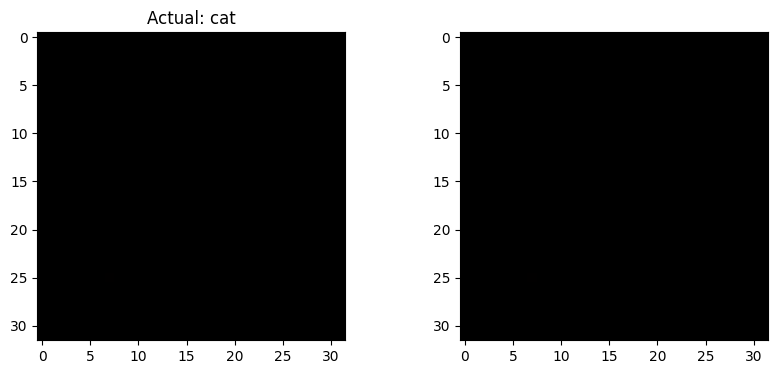

In [13]:
def display_predictions(predictions: np.ndarray, test_images: np.ndarray, test_labels: np.ndarray, class_names: List[str]) -> None:


    """ 
    Args:
    predictions (np.ndarray): Model predictions.
    test_images (np.ndarray): Test images.
    test_labels (np.ndarray): Actual labels for the test images.
    class_names (List[str]): List of class names.
    """
    for i in range(5):
        plt.figure(figsize=(10, 4))  
        # Display the original image with actual label
        plt.subplot(1, 2, 1)
        plt.imshow(rescale_image(test_images[i]))
        plt.title(f'Actual: {class_names[test_labels[i][0]]}')
        # Display the original image with predicted label
        plt.subplot(1, 2, 2)
        plt.imshow(rescale_image(test_images[i]))
        plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
        plt.show()

In [ ]:


# Example predictions
predictions: np.ndarray = cnn_model.predict(test_images[:5])

# Display predictions with rescaled images
def display_predictions(predictions: np.ndarray, test_images: np.ndarray, test_labels: np.ndarray, class_names: List[str]) -> None:
    """
    Displays the actual and predicted labels for a subset of test images.

    Args:
    predictions (np.ndarray): Model predictions.
    test_images (np.ndarray): Test images.
    test_labels (np.ndarray): Actual labels for the test images.
    class_names (List[str]): List of class names.
    """
    for i in range(5):
        plt.figure(figsize=(10, 4))
        # Display the original image with actual label
        plt.subplot(1, 2, 1)
        plt.imshow(rescale_image(test_images[i]))
        plt.title(f'Actual: {class_names[test_labels[i][0]]}')
        # Display the original image with predicted label
        plt.subplot(1, 2, 2)
        plt.imshow(rescale_image(test_images[i]))
        plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
        plt.show()

# Assume class_names is predefined list of class names
display_predictions(predictions, test_images, test_labels, class_names)

In [ ]:

# Function to rescale images for display
def rescale_image(image: np.ndarray) -> np.ndarray:
    """
    Rescales the image pixel values to the range [0, 1] for display.

    Args:
    image (np.ndarray): Input image.

    Returns:
    np.ndarray: Rescaled image.
    """
    image = image / 255.0
    return image

# Example predictions
predictions: np.ndarray = cnn_model.predict(test_images[:5])

# Display predictions with rescaled images
def display_predictions(predictions: np.ndarray, test_images: np.ndarray, test_labels: np.ndarray, class_names: List[str]) -> None:
    """
    Displays the actual and predicted labels for a subset of test images.

    Args:
    predictions (np.ndarray): Model predictions.
    test_images (np.ndarray): Test images.
    test_labels (np.ndarray): Actual labels for the test images.
    class_names (List[str]): List of class names.
    """
    for i in range(5):
        plt.figure(figsize=(10, 4))
        # Display the original image with actual label
        plt.subplot(1, 2, 1)
        plt.imshow(rescale_image(test_images[i]))
        plt.title(f'Actual: {class_names[test_labels[i][0]]}')
        # Display the original image with predicted label
        plt.subplot(1, 2, 2)
        plt.imshow(rescale_image(test_images[i]))
        plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
        plt.show()

# Assume class_names is predefined list of class names
display_predictions(predictions, test_images, test_labels, class_names)


## Generative Adversarial Network (GAN)

This section demonstrates how to create, compile, train, and generate images using a Generative Adversarial Network (GAN). GANs consist of two neural networks, a generator and a discriminator, that compete against each other to produce realistic images.

### Steps:
1. **Create the generator and discriminator models.**
2. **Compile the models with appropriate optimizers and loss functions.**
3. **Train the GAN on a dataset of images.**
4. **Generate and display new images using the trained generator.**


In [25]:
''' import tensorflow_datasets as tfds

# Load and preprocess the EuroSAT dataset
def preprocess_image(image, label):
    image = tf.image.resize(image, [32, 32])  # Resize to 32x32
    image = (image - 127.5) / 127.5  # Normalize to [-1, 1]
    return image, label

# Load EuroSAT dataset
dataset, info = tfds.load('eurosat', split='train', with_info=True, as_supervised=True)
dataset = dataset.map(preprocess_image)

# Define the generator model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(100,)))  # Define the input shape using Input layer
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(negative_slope=0.2))  # Use negative_slope instead of alpha
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(negative_slope=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(negative_slope=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(np.prod((32, 32, 3)), activation='tanh'))
    model.add(layers.Reshape((32, 32, 3)))
    return model

# Define the discriminator model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))  # Define the input shape using Input layer
    model.add(layers.Flatten())
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(negative_slope=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(negative_slope=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Compile the models
generator = build_generator()
discriminator = build_discriminator()

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)

# Loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Training step function
@tf.function
def train_step(real_images):
    noise = tf.random.normal([batch_size, 100])
    fake_images = generator(noise, training=True)

    with tf.GradientTape() as disc_tape:
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape:
        generated_images = generator(noise, training=True)
        gen_output = discriminator(generated_images, training=False)
        gen_loss = cross_entropy(tf.ones_like(gen_output), gen_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    return disc_loss, gen_loss

# Function to train the GAN
def train_gan(epochs, batch_size, sample_interval):
    X_train = []
    for image, label in tfds.as_numpy(dataset):
        image = np.array(image)
        if image.shape == (32, 32, 3):  # Ensure the shape is as expected
            X_train.append(image)
        else:
            print(f"Skipping image with shape {image.shape}")  # Debug statement
    X_train = np.array(X_train)

    print(f"Total images loaded: {len(X_train)}")
    if len(X_train) == 0:
        print("No images were loaded. Please check the dataset and preprocessing steps.")
        return

    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        for i in range(len(X_train) // batch_size):
            real_images = X_train[i * batch_size:(i + 1) * batch_size]
            d_loss, g_loss = train_step(real_images)

        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss.numpy()} | G loss: {g_loss.numpy()}]")

# Function to generate and display images
def generate_images(generator, num_images):
    noise = np.random.normal(0, 1, (num_images, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5  # Rescale to [0, 1]
    return gen_images

def display_generated_images(generator, epoch, num_images=10):
    gen_images = generate_images(generator, num_images)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 2, i+1)
        plt.imshow(gen_images[i])
        plt.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}")
    plt.show()

# Set batch size
batch_size = 64

# Train the GAN
train_gan(epochs=1000, batch_size=batch_size, sample_interval=100)
'''

Total images loaded: 27000
0 [D loss: 0.8468660116195679 | G loss: 1.6887357234954834]


KeyboardInterrupt: 

In [ ]:
# Define the generator model
def build_generator() -> models.Sequential:
    """
    Builds the generator model for the GAN.

    Returns:
    models.Sequential: The generator model.
    """
    model = models.Sequential()
    model.add(layers.Dense(256, input_dim=100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model`b.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(28 * 28 * 1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

In [ ]:
# Define the discriminator model
def build_discriminator() -> models.Sequential:
    """
    Builds the discriminator model for the GAN.

    Returns:
    models.Sequential: The discriminator model.
    """
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [ ]:
# Compile the discriminator
discriminator: models.Sequential = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Build the generator
generator: models.Sequential = build_generator()

In [ ]:
# Define the combined GAN model (stacked generator and discriminator)
def build_gan(generator: models.Sequential, discriminator: models.Sequential) -> models.Sequential:
    """
    Builds the combined GAN model by stacking the generator and the discriminator.

    Args:
    generator (models.Sequential): The generator model.
    discriminator (models.Sequential): The discriminator model.

    Returns:
    models.Sequential: The combined GAN model.
    """
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# Compile the GAN
gan: models.Sequential = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Training the GAN
def train_gan(gan: models.Sequential, generator: models.Sequential, discriminator: models.Sequential, 
              epochs: int, batch_size: int, training_data: np.ndarray) -> None:
    """
    Trains the GAN model.

    Args:
    gan (models.Sequential): The combined GAN model.
    generator (models.Sequential): The generator model.
    discriminator (models.Sequential): The discriminator model.
    epochs (int): Number of training epochs.
    batch_size (int): Size of the training batch.
    training_data (np.ndarray): Training dataset.
    """
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        # Train the discriminator with real samples
        idx = np.random.randint(0, training_data.shape[0], half_batch)
        real_images = training_data[idx]
        real_labels = np.ones((half_batch, 1))
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)

        # Train the discriminator with fake samples
        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)

        # Train the GAN
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print the progress
        print(f"{epoch + 1}/{epochs} [D loss: {0.5 * (d_loss_real[0] + d_loss_fake[0]):.4f}, acc.: {100 * 0.5 * (d_loss_real[1] + d_loss_fake[1]):.2f}%] [G loss: {g_loss:.4f}]")

# Assume training_data is a preprocessed dataset of images
# train_gan(gan, generator, discriminator, epochs=10000, batch_size=64, training_data=training_data)


In [ ]:
# Generating and displaying images
def generate_and_display_images(generator: models.Sequential, num_images: int = 5) -> None:
    """
    Generates and displays images using the trained generator model.

    Args:
    generator (models.Sequential): The trained generator model.
    num_images (int): Number of images to generate and display.
    """
    noise = np.random.normal(0, 1, (num_images, 100))
    generated_images = generator.predict(noise)

    for i in range(num_images):
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.title('Generated Image')
        plt.axis('off')
        plt.show()

# generate_and_display_images(generator, num_images=5)


## Variational Autoencoder (VAE)

This section demonstrates how to create, compile, train, and generate images using a Variational Autoencoder (VAE). VAEs are generative models that learn to encode input data into a latent space and decode from the latent space to generate new data.

### Steps:
1. **Create the encoder and decoder models.**
2. **Define the VAE by combining the encoder and decoder.**
3. **Compile the VAE with an appropriate loss function.**
4. **Train the VAE on a dataset of images.**
5. **Generate and display new images using the trained decoder.**


In [ ]:
from tensorflow.keras import backend as K

In [ ]:
# Sampling function for the latent space
def sampling(args: Tuple[tf.Tensor, tf.Tensor]) -> tf.Tensor:
    """
    Reparameterization trick by sampling from an isotropic unit Gaussian.

    Args:
    args (Tuple[tf.Tensor, tf.Tensor]): Mean and log of variance of the latent space.

    Returns:
    tf.Tensor: Sampled latent vector.
    """
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

#### Components and Steps for the sampling method.

1. **Inputs (args: Tuple[tf.Tensor, tf.Tensor])**
   - `z_mean`: The mean of the latent space distribution (output of the encoder).
   - `z_log_var`: The logarithm of the variance of the latent space distribution (output of the encoder).

2. **Compute Batch and Dimension**
   - `batch`: The number of samples in the batch (i.e., the batch size).
   - `dim`: The dimensionality of the latent space (latent dimension).

3. **Generate Random Noise (epsilon)**
   - `epsilon`: A tensor of random values sampled from a standard normal distribution (mean = 0, standard deviation = 1) with the same shape as the latent space (batch size, latent dimension).

4. **Reparameterization Trick**
   - `z = z_mean + K.exp(0.5 * z_log_var) * epsilon`: This line applies the reparameterization trick to generate a sample `z` from the latent space. Here's a breakdown of the operations:
     - `K.exp(0.5 * z_log_var)`: Converts the log variance to the standard deviation by exponentiating it and taking the square root (since `exp(0.5 * log_var) = sqrt(exp(log_var))`).
     - `K.exp(0.5 * z_log_var) * epsilon`: Scales the random noise `epsilon` by the standard deviation.
     - `z_mean + ...`: Shifts the scaled noise by the mean to produce the final sample `z`.


##### Why is the Reparameterization Trick Necessary?
In a VAE, the goal is to sample from a learned distribution (characterized by z_mean and z_log_var) during training. Directly sampling from this distribution would make it challenging to propagate gradients through the sampling operation because it introduces non-differentiable randomness.

The reparameterization trick solves this by expressing the random sample z as a deterministic function of z_mean, z_log_var, and a random variable epsilon drawn from a standard normal distribution. This formulation allows gradients to be backpropagated through z_mean and z_log_var, enabling the use of gradient-based optimization techniques.


### Understanding the Reparameterization Trick in Layman's Terms

The reparameterization trick is a clever method used in machine learning to make a complicated process easier to manage. It's especially important in Variational Autoencoders (VAEs), which are models that learn to generate new data, like creating new images that look like they came from a given dataset.

### The Problem

In a VAE, we have two parts: an encoder and a decoder.

1. **Encoder:** Takes an input (like an image) and compresses it into a smaller, simpler form called a "latent space." This latent space is described by two things:
   - **Mean (`z_mean`)**: The central point of this compressed space.
   - **Log Variance (`z_log_var`)**: Describes the spread or uncertainty around the mean.

2. **Decoder:** Takes this compressed form from the latent space and tries to reconstruct the original input (like recreating the image).

To make the model work, we need to sample points from this latent space. However, this sampling step is random and makes it hard to adjust the model during training because we can't easily calculate gradients, which are essential for learning.

### The Reparameterization Trick

The reparameterization trick is like a recipe for baking a cake. Instead of baking a cake directly, which might be tricky, you break it down into simpler steps that are easier to follow.

1. **Break Down the Sampling:**
   - Normally, sampling directly from the latent space would be hard.
   - Instead, we separate the process into simpler parts.

2. **Add Randomness:**
   - We start with a simple random noise (`epsilon`), like the basic ingredients in baking.
   - This noise is easy to handle because it's just random numbers from a normal distribution (like the basic ingredients you always have in your kitchen).

3. **Transform the Noise:**
   - We mix this noise with our "mean" and "variance" to get our final sample (`z`).
   - This is like mixing your ingredients according to a recipe to get the cake batter.

Here’s how the steps look in simpler terms:
- **Start with the mean (`z_mean`):** This is our central point.
- **Adjust the spread using the log variance (`z_log_var`):** This tells us how much to spread out from the mean.
- **Add randomness (`epsilon`):** This is our simple random noise.
- **Combine them:** Mix the mean, the adjusted spread, and the noise to get our final sample.

### Why This Trick is Useful

By breaking down the sampling process, we can:
- **Keep Things Simple:** The trick makes the sampling process easier to manage and understand.
- **Allow Learning:** Even though there's randomness, the process remains smooth enough for the model to learn and improve.
- **Train Efficiently:** We can use standard techniques to train the model, making the whole system more effective and stable.

### Real-World Analogy

Imagine you're trying to learn to draw circles of different sizes:
- **Direct Method:** You try to draw circles of random sizes directly, which can be chaotic and hard to improve upon.
- **Reparameterization Trick:** Instead, you first draw a standard-sized circle and then use a ruler (mean) and some guidelines (variance) to scale it up or down, adding a bit of randomness. This way, you can practice and improve more systematically.

### Summary

The reparameterization trick is a smart way to simplify a complex, random process in machine learning. It allows models like VAEs to learn and improve efficiently by breaking down the hard part (sampling) into simpler, manageable steps. This trick ensures that the model can generate new data effectively while still being easy to train and adjust.


In [ ]:
# Define the encoder model
def build_encoder(input_shape: Tuple[int, int, int], latent_dim: int) -> models.Model:
    """
    Builds the encoder model for the VAE.

    Args:
    input_shape (Tuple[int, int, int]): Shape of the input images.
    latent_dim (int): Dimensionality of the latent space.

    Returns:
    models.Model: The encoder model.
    """
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
    encoder = models.Model(inputs, [z_mean, z_log_var, z], name='encoder')
    return encoder

In [ ]:
# Define the decoder model
def build_decoder(latent_dim: int, output_shape: Tuple[int, int, int]) -> models.Model:
    """
    Builds the decoder model for the VAE.

    Args:
    latent_dim (int): Dimensionality of the latent space.
    output_shape (Tuple[int, int, int]): Shape of the output images.

    Returns:
    models.Model: The decoder model.
    """
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(128, activation='relu')(latent_inputs)
    x = layers.Dense(np.prod(output_shape), activation='relu')(x)
    x = layers.Reshape(output_shape)(x)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2DTranspose(output_shape[-1], (3, 3), activation='sigmoid', padding='same')(x)
    decoder = models.Model(latent_inputs, outputs, name='decoder')
    return decoder

In [ ]:
# Load and preprocess the EuroSAT dataset
def preprocess_image(image, label):
    image = tf.image.resize(image, [64, 64])  # Resize to 64x64
    image = (image - 127.5) / 127.5  # Normalize to [-1, 1]
    return image, image  # Using image as both input and output for reconstruction

In [2]:
# Load EuroSAT dataset
dataset, info = tfds.load('eurosat', split='train', with_info=True, as_supervised=True)
dataset = dataset.map(preprocess_image).batch(64)

NameError: name 'tfds' is not defined

In [ ]:
# Build the VAE model
def build_vae(encoder: models.Model, decoder: models.Model) -> models.Model:
    """
    Builds the Variational Autoencoder (VAE) model by combining the encoder and the decoder.

    Args:
    encoder (models.Model): The encoder model.
    decoder (models.Model): The decoder model.

    Returns:
    models.Model: The VAE model.
    """
    inputs = encoder.input
    z_mean, z_log_var, z = encoder(inputs)
    reconstructed = decoder(z)
    vae = models.Model(inputs, reconstructed, name='vae')

    # Define VAE loss
    reconstruction_loss = tf.keras.losses.binary_crossentropy(K.flatten(inputs), K.flatten(reconstructed))
    reconstruction_loss *= np.prod(input_shape)
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)

    return vae

In [ ]:
# Define input and latent dimensions
input_shape = (28, 28, 1)
latent_dim = 2

In [ ]:
# Build the encoder and decoder
encoder: models.Model = build_encoder(input_shape, latent_dim)
decoder: models.Model = build_decoder(latent_dim, input_shape)

In [ ]:
# Build and compile the VAE
vae: models.Model = build_vae(encoder, decoder)
vae.compile(optimizer='adam')

In [ ]:
# Training the VAE
def train_vae(vae: models.Model, training_data: np.ndarray, epochs: int, batch_size: int) -> tf.keras.callbacks.History:
    """
    Trains the VAE model.

    Args:
    vae (models.Model): The VAE model.
    training_data (np.ndarray): Training dataset.
    epochs (int): Number of training epochs.
    batch_size (int): Size of the training batch.

    Returns:
    tf.keras.callbacks.History: History object containing training history.
    """
    history = vae.fit(training_data, training_data, epochs=epochs, batch_size=batch_size, validation_split=0.1)
    return history



In [ ]:
# Assume training_data is a preprocessed dataset of images
history = train_vae(vae, training_data, epochs=50, batch_size=128)

In [ ]:
# Generating and displaying images
def generate_and_display_images(decoder: models.Model, num_images: int = 5) -> None:
    """
    Generates and displays images using the trained decoder model.

    Args:
    decoder (models.Model): The trained decoder model.
    num_images (int): Number of images to generate and display.
    """
    grid_x = np.linspace(-2, 2, num_images)
    grid_y = np.linspace(-2, 2, num_images)

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]])
            generated_image = decoder.predict(z_sample)
            plt.imshow(generated_image[0, :, :, 0], cmap='gray')
            plt.title('Generated Image')
            plt.axis('off')
            plt.show()

In [ ]:
generate_and_display_images(decoder, num_images=5)



'''
# Define the encoder model
def build_encoder(latent_dim):
    encoder_input = layers.Input(shape=(64, 64, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)
    return models.Model(encoder_input, [z_mean, z_log_var], name='encoder')

# Define the decoder model
def build_decoder(latent_dim):
    decoder_input = layers.Input(shape=(latent_dim,))
    x = layers.Dense(8*8*128, activation='relu')(decoder_input)
    x = layers.Reshape((8, 8, 128))(x)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoder_output = layers.Conv2DTranspose(3, (3, 3), activation='tanh', padding='same')(x)
    return models.Model(decoder_input, decoder_output, name='decoder')

# Define the VAE model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        epsilon = K.random_normal(shape=K.shape(z_mean))
        z = z_mean + K.exp(0.5 * z_log_var) * epsilon
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
        self.add_loss(kl_loss)
        return reconstructed

# Hyperparameters
latent_dim = 64

# Build encoder and decoder
encoder = build_encoder(latent_dim)
decoder = build_decoder(latent_dim)

# Build and compile VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='mean_squared_error')

# Custom training loop to handle the custom loss
epochs = 50
for epoch in range(epochs):
    for step, (batch, _) in enumerate(dataset):
        with tf.GradientTape() as tape:
            reconstruction = vae(batch)
            reconstruction_loss = tf.reduce_mean(tf.square(batch - reconstruction))
            total_loss = reconstruction_loss + sum(vae.losses)
        gradients = tape.gradient(total_loss, vae.trainable_variables)
        vae.optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
        if step % 100 == 0:
            print(f"Epoch {epoch + 1}, Step {step}, Loss: {total_loss.numpy()}")

# Generate new images
def generate_images(num_images):
    z_sample = np.random.normal(size=(num_images, latent_dim))
    generated_images = decoder.predict(z_sample)
    generated_images = 0.5 * generated_images + 0.5  # Rescale to [0, 1]
    return generated_images

# Display generated images
def display_generated_images(num_images=10):
    generated_images = generate_images(num_images)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 2, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.show()

# Display generated images
display_generated_images()
'''

In [3]:
## U-Net Model

This section demonstrates how to create, compile, and train a U-Net model.
U-Net is a convolutional network architecture for fast and precise segmentation of images.
It consists of a contracting path to capture context and a symmetric expanding path that 
enables precise localization.

### Steps:
1. **Create the U-Net model.**
2. **Compile the model with an appropriate optimizer and loss function.**
3. **Train the model on a dataset.**
4. **Evaluate the model's performance.**
5. **Visualize the model's predictions.**


SyntaxError: invalid syntax (3588527104.py, line 3)

In [ ]:
# Function to create a U-Net model
def unet_model(input_shape: Tuple[int, int, int]) -> models.Model:
    """
    Creates a U-Net model for image segmentation.

    Args:
    input_shape (Tuple[int, int, int]): Shape of the input images.

    Returns:
    models.Model: The U-Net model.
    """
    inputs = layers.Input(shape=input_shape)
    
    # Contracting path
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Expanding path
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
# Compile the model
input_shape = (128, 128, 1)
unet = unet_model(input_shape)
unet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Binary Crossentropy Loss Function

The binary crossentropy loss function, also known as log loss, is a loss function commonly used in binary classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1.

### Formula

For a single instance, the binary crossentropy loss can be defined as:

$$
\[ \text{Binary Crossentropy} = - \left( y \cdot \log(p) + (1 - y) \cdot \log(1 - p) \right) \]
$$

Where:

- \( y \) is the actual label (0 or 1).
- \( p \) is the predicted probability of the instance being in class 1.

For a dataset with multiple instances, the binary crossentropy loss is averaged over all instances:

$$
\[ \text{Binary Crossentropy} = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right) \]
$$

Where:
- \( N \) is the number of instances.
- \( y_i \) is the actual label of the \(i\)-th instance.
- \( p_i \) is the predicted probability of the \(i\)-th instance being in class 1.

### Intuition

1. **Correct Predictions:** If the model predicts a probability close to the actual class (e.g., 0.9 for class 1 or 1.1 for class 0), the loss will be low.
2. **Incorrect Predictions:** If the model predicts a probability far from the actual class (e.g., 0.1 for class 1 or 0.9 for class 0), the loss will be high.

### Why Use Binary Crossentropy?

- **Probabilistic Interpretation:** Binary crossentropy is suitable for models that output probabilities. It effectively penalizes the model more as the predicted probability diverges from the actual label.
- **Differentiability:** The function is differentiable, which makes it suitable for gradient-based optimization algorithms like stochastic gradient descent (SGD).
- **Focus on Confident Predictions:** The logarithmic nature of the loss function ensures that the model gets penalized more for making confident but wrong predictions than for uncertain predictions.

### Use in Neural Networks

In neural networks, binary crossentropy is commonly used as a loss function when the output layer has a sigmoid activation function. The sigmoid activation function maps the output to a probability value between 0 and 1, making it compatible with binary crossentropy.




In [ ]:
# Assume train_images, train_masks, test_images, test_masks are predefined datasets
# Train the model
history = unet.fit(train_images, train_masks, epochs=50, batch_size=32, validation_data=(test_images, test_masks))

In [ ]:
# Evaluate the model
def evaluate_unet_model(model: models.Model, test_images: np.ndarray, test_masks: np.ndarray) -> Tuple[float, float]:
    """
    Evaluates the U-Net model on the test dataset.

    Args:
    model (models.Model): The trained U-Net model.
    test_images (np.ndarray): Test images.
    test_masks (np.ndarray): Test masks.

    Returns:
    Tuple[float, float]: Test loss and test accuracy.
    """
    test_loss, test_acc = model.evaluate(test_images, test_masks, verbose=2)
    return test_loss, test_acc

In [ ]:
test_loss, test_acc = evaluate_unet_model(unet, test_images, test_masks)
print(f'Test accuracy: {test_acc * 100:.2f}%')


In [ ]:
# Visualize predictions
def visualize_unet_predictions(model: models.Model, test_images: np.ndarray, test_masks: np.ndarray, num_images: int = 5) -> None:
    """
    Visualizes predictions of the U-Net model on sample images from the test dataset.

    Args:
    model (models.Model): The trained U-Net model.
    test_images (np.ndarray): Test images.
    test_masks (np.ndarray): Actual masks for the test images.
    num_images (int): Number of images to visualize.
    """
    predictions = model.predict(test_images[:num_images])

    for i in range(num_images):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        plt.imshow(test_images[i].squeeze(), cmap='gray')
        plt.title('Input Image')
        plt.subplot(1, 3, 2)
        plt.imshow(test_masks[i].squeeze(), cmap='gray')
        plt.title('True Mask')
        plt.subplot(1, 3, 3)
        plt.imshow(predictions[i].squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.show()

In [ ]:
# Visualize the predictions on some test images
visualize_unet_predictions(unet, test_images, test_masks)

In [29]:
"""
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load and preprocess the EuroSAT dataset
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize to 128x128
    image = image / 255.0  # Normalize to [0, 1]
    return image, image  # Use image as both input and target for autoencoding/segmentation tasks

# Load EuroSAT dataset
dataset, info = tfds.load('eurosat', split='train', with_info=True, as_supervised=True)
dataset = dataset.map(preprocess_image).batch(32)

# Define the U-Net model
def unet_model(input_size=(128, 128, 3)):
    inputs = tf.keras.Input(shape=input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Build and compile the U-Net model
model = unet_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(dataset, epochs=20)

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Predict and display some example results
def display_predictions(dataset, model, num_images=5):
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        plt.figure(figsize=(10, 10))
        for i in range(num_images):
            plt.subplot(num_images, 3, i * 3 + 1)
            plt.imshow(images[i])
            plt.title('Input')
            plt.axis('off')

            plt.subplot(num_images, 3, i * 3 + 2)
            plt.imshow(predictions[i])
            plt.title('Prediction')
            plt.axis('off')

            plt.subplot(num_images, 3, i * 3 + 3)
            plt.imshow(labels[i])
            plt.title('Ground Truth')
            plt.axis('off')
        plt.show()

# Display predictions
display_predictions(dataset, model)
"""


TensorFlow version: 2.16.1
Num GPUs Available:  0
Available GPUs:  []
Epoch 1/20
 82/844 ━━━━━━━━━━━━━━━━━━━━ 1:45:01 8s/step - loss: 0.0175

KeyboardInterrupt: 

## Attention Model

This section demonstrates how to create, compile, train, and visualize an Attention model. The attention mechanism allows the model to focus on different parts of the input sequence, enhancing its ability to handle long-range dependencies and improve performance on tasks like image classification and natural language processing.

### Steps:
1. **Create the Attention Layer.**
2. **Build the Attention model.**
3. **Compile the model with an appropriate optimizer and loss function.**
4. **Train the model on a dataset.**
5. **Evaluate the model's performance.**
6. **Visualize the attention weights.**


In [ ]:
# Define the Attention Layer class
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape: Tuple[int, ...]) -> None:
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], 1), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[1], 1), initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self, inputs: tf.Tensor, **kwargs) -> tf.Tensor:
        e = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        alpha = tf.nn.softmax(e, axis=1)
        context = tf.reduce_sum(alpha * inputs, axis=1)
        return context

In [ ]:
# Function to build the Attention model
def build_attention_model(input_shape: Tuple[int, int, int]) -> models.Model:
    """
    Builds a Convolutional Neural Network (CNN) model with an attention layer.

    Args:
    input_shape (Tuple[int, int, int]): Shape of the input images.

    Returns:
    models.Model: Compiled CNN model with attention.
    """
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Reshape((-1, 128))(x)  # Reshape for the attention layer
    attention = AttentionLayer()(x)
    outputs = layers.Dense(10, activation='softmax')(attention)
    model = models.Model(inputs, outputs)
    return model

In [ ]:
# Build and compile the model
input_shape = (64, 64, 3)
model = build_attention_model(input_shape)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Assume `dataset` is a preprocessed dataset
# Train the model
history = model.fit(dataset, epochs=10)

In [ ]:
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
def evaluate_model(dataset: tf.data.Dataset, model: models.Model) -> None:
    """
    Evaluates the model on the provided dataset.

    Args:
    dataset (tf.data.Dataset): Dataset for evaluation.
    model (models.Model): Trained model to be evaluated.
    """
    accuracy = model.evaluate(dataset)
    print(f'Accuracy: {accuracy[1] * 100:.2f}%')


In [ ]:
evaluate_model(dataset, model)


In [ ]:
# Visualize Attention Weights
def visualize_attention_weights(image: tf.Tensor, model: models.Model) -> None:
    """
    Visualizes the attention weights on a sample image.

    Args:
    image (tf.Tensor): Input image.
    model (models.Model): Trained model with an attention layer.
    """
    attention_layer_model = models.Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
    attention_weights = attention_layer_model.predict(tf.expand_dims(image, axis=0))[0]

    plt.imshow(image)
    plt.imshow(attention_weights, cmap='jet', alpha=0.5)
    plt.title('Attention Map')
    plt.show()

In [ ]:
# Visualize attention on some test images
for images, _ in dataset.take(1):
    for i in range(5):
        visualize_attention_weights(images[i], model)

In [32]:

'''

# Define an Attention Layer
class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal', trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer='random_normal', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        u_t = tf.tanh(tf.tensordot(inputs, self.W, axes=[-1, 0]) + self.b)
        a_t = tf.tensordot(u_t, self.u, axes=[-1, 0])
        a_t = tf.nn.softmax(a_t)
        output = inputs * tf.expand_dims(a_t, -1)
        return tf.reduce_sum(output, axis=1)

# Define the model with attention mechanism
def build_attention_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Reshape((-1, 128))(x)  # Reshape for the attention layer
    attention = AttentionLayer()(x)
    outputs = layers.Dense(10, activation='softmax')(attention)
    model = models.Model(inputs, outputs)
    return model

# Build and compile the model
input_shape = (64, 64, 3)
model = build_attention_model(input_shape)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(dataset, epochs=10)

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Evaluate the model
def evaluate_model(dataset, model):
    accuracy = model.evaluate(dataset)
    print(f'Accuracy: {accuracy[1] * 100:.2f}%')

evaluate_model(dataset, model)

# Visualize Attention Weights
def visualize_attention_weights(image, model):
    attention_layer_model = models.Model(inputs=model.input, outputs=model.get_layer('attention_layer').output)
    attention_weights = attention_layer_model.predict(tf.expand_dims(image, axis=0))[0]
    
    plt.imshow(image)
    plt.imshow(attention_weights, cmap='jet', alpha=0.5)
    plt.title('Attention Map')
    plt.show()

# Visualize attention on some test images
for images, _ in dataset.take(1):
    for i in range(5):
        visualize_attention_weights(images[i], model)
'''

TensorFlow version: 2.16.1
Num GPUs Available:  0
Available GPUs:  []
Epoch 1/10
516/844 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.3312 - loss: 1.7649

KeyboardInterrupt: 